<a href="https://colab.research.google.com/github/santosh-kumar8367/VIT_ED1/blob/master/Copy_of_NLP_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Assignment
In this assignment you will learn to do some data cleaning, prepare your features and do some K Means clustering on the data.

[Download data from here](https://drive.google.com/open?id=1ozz0zITDG8wOSQtwop2NC7AM_T3O59nj)

Load it as a pandas dataframe


In [0]:
# Your code here
import pandas as pd
import numpy as np

In [0]:
df1=pd.read_csv("/content/amazon_co-ecommerce_sample.csv")
d=df1.drop(['uniq_id'],axis=1)
d

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers,customer_reviews,sellers
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...,Worth Buying For The Pictures Alone (As Ever) ...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ..."
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...,Four Stars // 4.0 // 18 Dec. 2015 // By\n \...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ..."
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,What is the gauge of the track // Hi Paul.Trut...,**Highly Recommended!** // 5.0 // 26 May 2015 ...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel..."
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it // 5.0 // 22 July 2013 // By\n \n...,NaN
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present // 5.0 // 14 April 2014 // By...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,NaN,Realistic // 5.0 // 31 Mar. 2014 // By\n \n...,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig..."
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,NaN
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,htt

We are interested in customer_reviews column. However, the column is not clean data. It contains review title, rating, date, customer name, and review all in one scell separated by //

[Read this tutorial](https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/)

Extract the customer reviews in another dataframe and separate each of the components


In [0]:
new=d['customer_reviews'].str.split("//",n=3,expand=True)
d['review title']=new[0]
d['rating']=new[1]
d['date']=new[2]
d['customer name']=new[3]
#d['review all in one scell']=new[4]
d.drop(columns=['customer_reviews','customer_questions_and_answers'],inplace=True)

In [0]:
# your code here
d

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,sellers,review title,rating,date,customer name
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,By\n \n Copnovelist\n \n on 6 April 20...
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",Four Stars,4.0,18 Dec. 2015,By\n \n kenneth bell\n \n on 18 Dec. 2...
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,2.0,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",**Highly Recommended!**,5.0,26 May 2015,By\n \n Simon.B :-)\n \n on 26 May 201...
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,2.0,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it,5.0,22 July 2013,By\n \n Lilla Lukacs\n \n on 22 July 2...
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,2.0,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present,5.0,14 April 2014,By\n \n Love my Dog\n \n on 14 April 2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,3.0,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig...",Realistic,5.0,31 Mar. 2014,By\n \n Ray\n \n on 31 Mar. 2014 // Ve...
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,3.0,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,4.0,9 Dec. 2014,By\n \n Janet R.\n \n on 9 Dec. 2014 /...
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,3.0,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight15

Now the customer name column needs to be cleaned. Extract only the customer name and remove the By and on part in similar manner. This time you need to split by '\n'

In [0]:
# your code here
new1=d['customer name'].str.split("\n",n=4,expand=True)
d['name_of customer']=new1[2]
d.drop(columns=['customer name','number_of_answered_questions'],inplace=True)
d

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,sellers,review title,rating,date,name_of customer
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,Copnovelist
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",Four Stars,4.0,18 Dec. 2015,kenneth bell
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",**Highly Recommended!**,5.0,26 May 2015,Simon.B :-)
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it,5.0,22 July 2013,Lilla Lukacs
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present,5.0,14 April 2014,Love my Dog
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig...",Realistic,5.0,31 Mar. 2014,Ray
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,4.0,9 Dec. 2014,Janet R.
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,http://www.amazon.co.uk/Olde-Scotland-Yard-Ltd...,"{""seller""=>[{""Seller_name_1""=>""YUK"", ""Seller_p...",Five Stars,5.0,18 Dec. 2015,Amazon Customer
9998,Justice League of America Series 3 Green Lante...,DC C

Create another column nlpreview and copy the review column as it is
apply removal of punctuation and extract all words as a list of words. 

**Hint**: You may have to use [apply method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html) on dataframe series with a lambda function that does your tokenization etc. You can use sentence/word tokenizer but you will get extra credit if you use RegExpTokenizer. [Documentation for help](https://kite.com/python/docs/nltk.tokenize)

In [0]:
d['nlpreview']=d['review title']
d

,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,average_review_rating,amazon_category_and_sub_category,customers_who_bought_this_item_also_bought,description,product_information,product_description,items_customers_buy_after_viewing_this_item,sellers,review title,rating,date,name_of customer,nlpreview
0,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,"{""seller""=>[{""Seller_name_1""=>""Amazon.co.uk"", ...",Worth Buying For The Pictures Alone (As Ever),4.0,6 April 2014,Copnovelist,Worth Buying For The Pictures Alone (As Ever)
1,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,"{""seller""=>{""Seller_name_1""=>""UHD WHOLESALE"", ...",Four Stars,4.0,18 Dec. 2015,kenneth bell,Four Stars
2,CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...,ccf,£9.99,2 new,17,3.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Classic-Train-Lights-B...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,Technical Details Manufacturer recommended age...,BIG CLASSIC TOY TRAIN SET TRACK CARRIAGE LIGHT...,http://www.amazon.co.uk/Train-With-Tracks-Batt...,"{""seller""=>[{""Seller_name_1""=>""DEAL-BOX"", ""Sel...",**Highly Recommended!**,5.0,26 May 2015,Simon.B :-),**Highly Recommended!**
3,HORNBY Coach R4410A BR Hawksworth Corridor 3rd,Hornby,£39.99,NaN,1,5.0 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,NaN,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,Technical Details Item Weight259 g Product Dim...,Hornby 00 Gauge BR Hawksworth 3rd Class W 2107...,NaN,NaN,I love it,5.0,22 July 2013,Lilla Lukacs,I love it
4,Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...,Hornby,£32.19,NaN,3,4.7 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,http://www.amazon.co.uk/Hornby-R6367-RailRoad-...,Product Description Hornby RailRoad 0-4-0 Gild...,Technical Details Item Weight159 g Product Dim...,Product Description Hornby RailRoad 0-4-0 Gild...,http://www.amazon.co.uk/Hornby-R2672-RailRoad-...,NaN,Birthday present,5.0,14 April 2014,Love my Dog,Birthday present
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Batman 1966 TV Series Action Figures - The Rid...,Mattel,£22.95,5 new,3,5.0 out of 5 stars,Hobbies > Collectible Figures & Memorabilia > ...,http://www.amazon.co.uk/Batman-1966-Series-Act...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,Technical Details Item Weight136 g Product Dim...,DC 66 Batman Classic TV Series 6 Inch Riddler ...,NaN,"{""seller""=>[{""Seller_name_1""=>""Star Action Fig...",Realistic,5.0,31 Mar. 2014,Ray,Realistic
9996,"Star Wars Costume, Kids Stormtrooper Costume S...",Star Wars,£39.99,NaN,1,4.0 out of 5 stars,Characters & Brands > Star Wars > Toys,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,Technical Details Additional Information AS...,NaN,http://www.amazon.co.uk/Storm-Trooper-Costume-...,NaN,... what I see my grandson us going to have fu...,4.0,9 Dec. 2014,Janet R.,... what I see my grandson us going to have fu...
9997,Defiance Lawkeeper Metal Badge Prop Replica,Olde Scotland Yard Ltd.,£43.99,3 new,1,5.0 out of 5 stars,Novelty & Special Use > Novelty > Accessories ...,NaN,*Includes 1x Badge with holder and chain *High...,Technical Details Item Weight159 g Product Dim...,*Includes 1x Badge with holder and chain *High...,http://www.amazon.co.uk/Olde-S

In [0]:
d['nlpreview']=d['nlpreview'].astype(str)

In [0]:
# your code here
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = nltk.RegexpTokenizer(r"\w+")
d['nlpreview']=d['nlpreview'].apply(lambda x:tokenizer.tokenize(x))

In [0]:
#=d['nlpreview'].astype(str)

In [0]:
d['nlpreview']

0       [Worth, Buying, For, The, Pictures, Alone, As,...
1                                           [Four, Stars]
2                                   [Highly, Recommended]
3                                           [I, love, it]
4                                     [Birthday, present]
                              ...                        
9995                                          [Realistic]
9996    [what, I, see, my, grandson, us, going, to, ha...
9997                                        [Five, Stars]
9998                    [The, best, sculpt, in, a, while]
9999                                       [Gold, leader]
Name: nlpreview, Length: 10000, dtype: object

Remove stopwords in the nlpreview column

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
def rem_stopword(h):
  filt_rev=[i for i in h if i.lower() not in stop_words]
  return filt_rev
d['nlpreview']=d['nlpreview'].apply(lambda x:rem_stopword(x))

In [0]:
d['nlpreview']

0       [Worth, Buying, Pictures, Alone, Ever]
1                                [Four, Stars]
2                        [Highly, Recommended]
3                                       [love]
4                          [Birthday, present]
                         ...                  
9995                               [Realistic]
9996           [see, grandson, us, going, fun]
9997                             [Five, Stars]
9998                            [best, sculpt]
9999                            [Gold, leader]
Name: nlpreview, Length: 10000, dtype: object

In [0]:
#d['nlpreview']=d['nlpreview'].astype(str)

Use stemming/lemmatization. There are several options, so [read the docs](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python).

In [0]:
from nltk.stem.lancaster import LancasterStemmer
st=LancasterStemmer()
def stem(j):
  stemmedWords=[st.stem(word) for word in j]
  return stemmedWords

In [0]:
d['stem_review']=d['nlpreview'].apply(lambda x:stem(x))

In [0]:
d['stem_review']

0            [wor, buy, pict, alon, ev]
1                          [four, star]
2                     [high, recommend]
3                                 [lov]
4                      [birthday, pres]
                     ...               
9995                             [real]
9996    [see, grandson, us, going, fun]
9997                        [fiv, star]
9998                     [best, sculpt]
9999                       [gold, lead]
Name: stem_review, Length: 10000, dtype: object

In [0]:
# your code here
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
def get_lemma(n):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for i in n:
        lemma.append(wordnet_lemmatizer.lemmatize(i))
    return lemma

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
d['lem_nlpreview']=d['nlpreview'].apply(lambda x:get_lemma(x))

In [0]:
d.iloc[:,17:]

,nlpreview,stem_review,lem_nlpreview
0,"[Worth, Buying, Pictures, Alone, Ever]","[wor, buy, pict, alon, ev]","[Worth, Buying, Pictures, Alone, Ever]"
1,"[Four, Stars]","[four, star]","[Four, Stars]"
2,"[Highly, Recommended]","[high, recommend]","[Highly, Recommended]"
3,[love],[lov],[love]
4,"[Birthday, present]","[birthday, pres]","[Birthday, present]"
...,...,...,...
9995,[Realistic],[real],[Realistic]
9996,"[see, grandson, us, going, fun]","[see, grandson, us, going, fun]","[see, grandson, u, going, fun]"
9997,"[Five, Stars]","[fiv, star]","[Five, Stars]"
9998,"[best, sculpt]","[best, sculpt]","[best, sculpt]"


Find the first 100 most important words, i.e. most frequently used words and plot them using FreqDist plot in nltk. See the sample colab file given during class. Note your observations.

In [0]:
words=[i for i in d['lem_nlpreview']]
words

[['Worth', 'Buying', 'Pictures', 'Alone', 'Ever'],
 ['Four', 'Stars'],
 ['Highly', 'Recommended'],
 ['love'],
 ['Birthday', 'present'],
 ['Five', 'Stars'],
 ['High', 'standard', 'model', 'well', 'worth', 'wait', 'Replaces'],
 ['Beautiful', 'set'],
 ['Five', 'Stars'],
 ['Chuggers', 'go'],
 ['steaming', 'good', 'engine'],
 ['Five', 'Stars'],
 ['Five', 'Stars'],
 ['Gods', 'Wonderful', 'Railway'],
 ['Kato', 'model', 'engine', 'n', 'gauge'],
 ['Five', 'Stars'],
 ['expected'],
 ['Good', 'fun', 'long'],
 ['Four', 'Stars'],
 ['SECOND', 'BACHMANN', 'POWERHAULS', 'COMING'],
 ['excellent', 'HO', 'scale', 'diorama', 'piece'],
 ['excellent', 'HO', 'scale', 'diorama', 'piece'],
 ['Five', 'Stars'],
 ['nice', 'change', 'Thomas', 'stuff'],
 ['Excellent',
  'model',
  'perfect',
  'condition',
  'reputeable',
  'amazon',
  'seller'],
 ['Fabulous'],
 ['Five', 'Stars'],
 ['Molly', 'Thomas', 'Tank', 'engine'],
 ['Olympic', 'Gold'],
 ['Five', 'Stars'],
 ['Five', 'Stars'],
 ['great', 'fun'],
 ['Fairground', 

In [0]:
output=[]
def reemovNestings(l): 
    for i in l: 
        if type(i) == list: 
            reemovNestings(i) 
        else: 
            output.append(i)

In [0]:
reemovNestings(words)
print(output)

['Worth', 'Buying', 'Pictures', 'Alone', 'Ever', 'Four', 'Stars', 'Highly', 'Recommended', 'love', 'Birthday', 'present', 'Five', 'Stars', 'High', 'standard', 'model', 'well', 'worth', 'wait', 'Replaces', 'Beautiful', 'set', 'Five', 'Stars', 'Chuggers', 'go', 'steaming', 'good', 'engine', 'Five', 'Stars', 'Five', 'Stars', 'Gods', 'Wonderful', 'Railway', 'Kato', 'model', 'engine', 'n', 'gauge', 'Five', 'Stars', 'expected', 'Good', 'fun', 'long', 'Four', 'Stars', 'SECOND', 'BACHMANN', 'POWERHAULS', 'COMING', 'excellent', 'HO', 'scale', 'diorama', 'piece', 'excellent', 'HO', 'scale', 'diorama', 'piece', 'Five', 'Stars', 'nice', 'change', 'Thomas', 'stuff', 'Excellent', 'model', 'perfect', 'condition', 'reputeable', 'amazon', 'seller', 'Fabulous', 'Five', 'Stars', 'Molly', 'Thomas', 'Tank', 'engine', 'Olympic', 'Gold', 'Five', 'Stars', 'Five', 'Stars', 'great', 'fun', 'Fairground', 'train', 'set', 'Brilliant', 'Five', 'Stars', 'Great', 'value', 'quality', 'Good', 'introduction', 'model', '

In [0]:
# your code here
#matplotlib.use('TkAgg') 
import matplotlib
from nltk.probability import FreqDist
fd=FreqDist(output)
#def plot_freq_dist(words, num_words = 20):
   # fdist = FreqDist(wordsWOStopwords)
   # fdist.plot(num_words,cumulative=False)
print(fd.most_common(100))

[('Stars', 2357), ('Five', 1994), ('Great', 701), ('good', 445), ('Good', 372), ('great', 358), ('Four', 331), ('fun', 270), ('quality', 257), ('Excellent', 223), ('toy', 206), ('product', 195), ('love', 189), ('value', 172), ('model', 169), ('little', 169), ('set', 133), ('game', 130), ('Brilliant', 117), ('Perfect', 108), ('nice', 106), ('money', 106), ('figure', 104), ('happy', 102), ('Lovely', 101), ('old', 100), ('Nice', 94), ('price', 92), ('buy', 91), ('Fantastic', 90), ('gift', 88), ('item', 85), ('Fun', 84), ('loved', 84), ('well', 81), ('one', 81), ('year', 79), ('card', 79), ('car', 77), ('excellent', 76), ('present', 74), ('kid', 72), ('made', 71), ('son', 69), ('like', 68), ('Model', 64), ('perfect', 62), ('look', 62), ('fan', 62), ('time', 60), ('Really', 60), ('puppet', 60), ('really', 57), ('service', 56), ('recommend', 56), ('best', 55), ('pleased', 55), ('kit', 54), ('child', 54), ('Love', 54), ('bit', 53), ('brilliant', 52), ('balloon', 52), ('detail', 51), ('doll', 

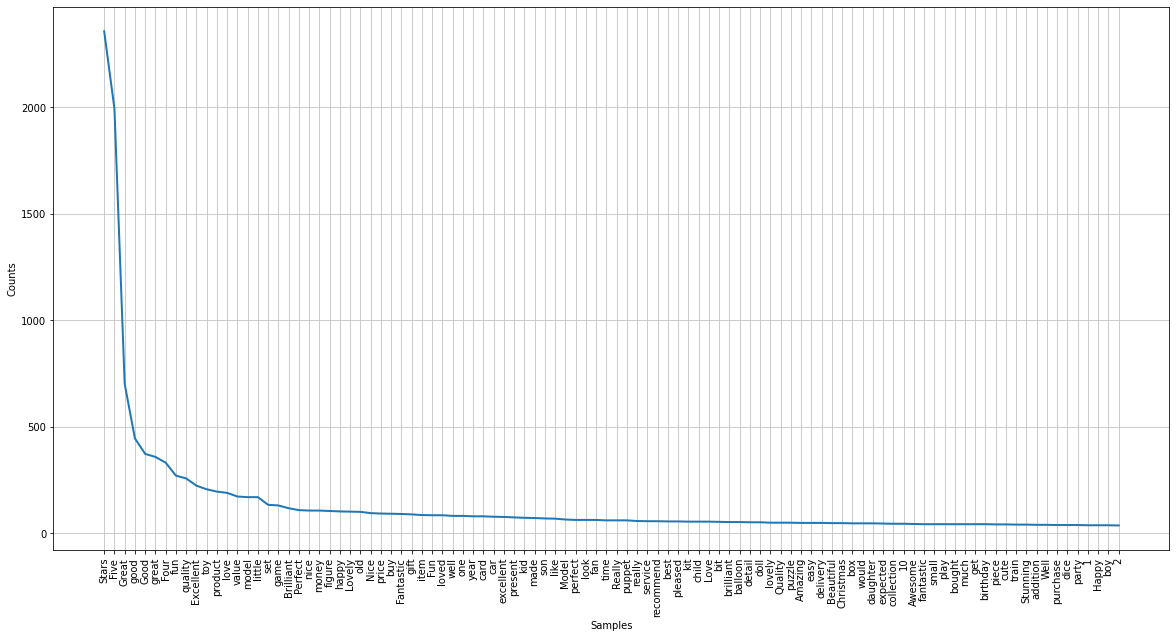

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
fd.plot(100,cumulative=False)

Create another column called TFIDF and use the nlpreview to construct tfidf in this newly created column

In [0]:
# your code here
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(output)

In [0]:
vectorizer.get_feature_names()[:100]

['00',
 '007',
 '04',
 '10',
 '100',
 '10yo',
 '11',
 '11teens',
 '12',
 '120',
 '127',
 '13',
 '13th',
 '14',
 '140',
 '14mm',
 '15',
 '15mm',
 '16',
 '16cm',
 '17',
 '17th',
 '18',
 '18th',
 '1900',
 '1930',
 '1934',
 '1948',
 '1963',
 '1968',
 '1970',
 '1970s',
 '1972',
 '1976',
 '1980s',
 '1985',
 '1990',
 '1999',
 '1ausf',
 '1st',
 '20',
 '2000',
 '2008',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '205',
 '21st',
 '234',
 '24',
 '2478r',
 '25',
 '251',
 '26',
 '26th',
 '28119',
 '2cv',
 '2mm',
 '2nd',
 '2v',
 '30',
 '3000mah',
 '309',
 '30min',
 '30th',
 '32',
 '321',
 '3300020',
 '33097',
 '33cm',
 '35',
 '350',
 '36',
 '37',
 '3c',
 '3d',
 '3mm',
 '3rd',
 '3xl',
 '3y',
 '3year',
 '3yr',
 '3yrs',
 '40',
 '40cms',
 '40k',
 '40th',
 '43',
 '46',
 '47',
 '48',
 '4868',
 '48th',
 '4mglass',
 '4th',
 '4x4',
 '4yr']

In [0]:
print(X)

  (0, 4383)	1.0
  (1, 672)	1.0
  (2, 2940)	1.0
  (6, 3726)	1.0
  (7, 1979)	1.0
  (8, 3248)	1.0
  (9, 2410)	1.0
  (10, 497)	1.0
  (11, 3064)	1.0
  (13, 3726)	1.0
  (14, 1978)	1.0
  (15, 3716)	1.0
  (16, 2613)	1.0
  (18, 4383)	1.0
  (19, 4266)	1.0
  (20, 3271)	1.0
  (21, 445)	1.0
  (22, 3487)	1.0
  (24, 3726)	1.0
  (25, 838)	1.0
  (27, 3747)	1.0
  (28, 1804)	1.0
  (29, 1402)	1.0
  (31, 3726)	1.0
  (33, 3726)	1.0
  :	:
  (27986, 1583)	1.0
  (27987, 2139)	1.0
  (27988, 2448)	1.0
  (27989, 1527)	1.0
  (27990, 3655)	1.0
  (27992, 3595)	1.0
  (27993, 1229)	1.0
  (27995, 4416)	1.0
  (27996, 2779)	1.0
  (27997, 2410)	1.0
  (27998, 607)	1.0
  (27999, 3454)	1.0
  (28000, 976)	1.0
  (28001, 2366)	1.0
  (28002, 4046)	1.0
  (28003, 2220)	1.0
  (28004, 3229)	1.0
  (28006, 1834)	1.0
  (28008, 1799)	1.0
  (28009, 1704)	1.0
  (28011, 3726)	1.0
  (28012, 476)	1.0
  (28013, 3454)	1.0
  (28014, 1800)	1.0
  (28015, 2309)	1.0


Find the top 100 words with maximum TF IDF score and plot it. Note your observations and see how different it is from the Top 100 highest frequency words.

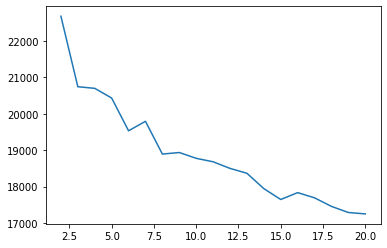

In [0]:
# your code here
r=range(2,21)
ws=[]
from sklearn.cluster import KMeans
for i in range(2,21):
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(X)
  ss=kmeans.inertia_
  ws.append(ss)
plt.plot(r,ws)

Use KMeans clustering to apply clustering to this TFIDF column. Find optimal number of clusters using elbow plot and note your observations for the optimal clusters.

# visualize your clusters
 Let us use word cloud visualization.

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plotwordcloud(words):
  wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(words) 
  plt.figure(figsize=(10, 7)) 
  plt.imshow(wordcloud, interpolation="bilinear") 
  plt.axis('off') 
  plt.show()

In [0]:
# your code here to call plotwordcloud for concatenated word set of each cluster. You need to find all words of a cluster and create a set.

#Sentiment Analysis
Ideally it is difficult to do sentiment analysis without having labeled data.

We can do following:
1. Use the rating column and rate 1,2 as negative and 4,5 as positive and reject 3 for now. Then we do 70/30 split of our data into train/test set 
2. Use a lexicon of positive and negative words and calculate score of each review using high score for positive and low score for negative review and pick a threshold above which a review is positive. We can find known positive or negative words in a review and sum their scores up to get a final score.

However, note that text is tricky:

E.g. consider a sentence in review of a smart watch: *The product is not only good but also does not spoil in water.*

It is a positive review but has lot of negaive words not, spoil etc. In these cases one has to go for bi or tri grams, e.g. *not only good* is a positive trigram. *does not spoil* is another one. However adding trigrams make your problem tough. If a review has 10 words, it will have 7 trigrams and 8 bigrams in it, making the features more.


In [0]:
# create a column sentiment with 0 meaning negative and 1 meaning positive and construct this based on the rule in point 1 above.
#f=d.iloc[]
f=d.iloc[:,14:]
j=f.drop(columns=['date','name_of customer','stem_review','lem_nlpreview'])
j.dropna(axis=0)
j.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating     9979 non-null   object
 1   nlpreview  10000 non-null  object
dtypes: object(2)
memory usage: 156.4+ KB


In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
label=LabelEncoder()

Read [this stack overflow post](https://stackoverflow.com/questions/47778403/computing-tf-idf-on-the-whole-dataset-or-only-on-training-data). It tells you how to create you train and test data.

In [0]:
# shuffle and split your data in train test (70/30) with tfidf as your features and sentiment as your labels

In [0]:
# plot word clourds for positive and negative training examples

In [0]:
# use and supervised classification approach of your choice and report your accuracy

Evaluate your model by trying your own reviews.

Process will be:
1. Calculate tf-idf of the review using [transform() method](https://stackoverflow.com/questions/47778403/computing-tf-idf-on-the-whole-dataset-or-only-on-training-data)
2. run your model on the tf-idf vector and see the sentiment predicted.

In [0]:
# try your model on new data ie. your own cooked up data say some review that you write

# Approach 2 - Lexicon way
We will try the lexicons. Rather than doing the work on our own we shall use built in lexicons in NLTK.
You can [read about vader here](http://datameetsmedia.com/staging/3908/vader-sentiment-analysis-explained/)

In [0]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer 

In [0]:
sentiment_analyzer = SentimentIntensityAnalyzer()
scores = []
# for each review in your dataframe (here we need full review and not bother about removing stopwords, punctuations etc. In fact vader needs them!)
# your loop statement e.g., for sentence in ????
     #print(sentence)
     sentiment_score = sentiment_analyzer.polarity_scores(sentence)
     scores.append(sentiment_score)

# let us see first 10 results. You can change this code to see more.
for sentiment_score in scores[:10]:
  for score in sentiment_score:
         print('{0}: {1},' .format(score, sentiment_score[score]), end='')

You can analyze the outcomes. See what threshold you want to pick!